<a href="https://colab.research.google.com/github/Francisco2963/Machine-Learning/blob/An%C3%A1lisis-y-Predicci%C3%B3n-de-Precios-de-Autos-(Core)/02_An%C3%A1lisis_y_Predicci%C3%B3n_de_Precios_de_Autos_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Predicción de Precios de Autos (Core)

Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

Dataset: Automobile Dataset

Descripción del Dataset: Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

Instrucciones:

Parte 1: Análisis Exploratorio de Datos (EDA)

 1. Carga y Exploración de Datos:

Cargar el dataset y revisar la estructura básica.
Descripción de las variables y su distribución.
Detección y tratamiento de valores nulos.
Identificación y tratamiento de outliers.
Análisis de correlación entre variables.

Parte 2: Preparación de Datos

 2. Preprocesamiento:

Selección de características importantes.

Transformación de variables categóricas.

División del conjunto de datos en entrenamiento y prueba.

Escalado de características.

Parte 3: Modelos de Regresión

 3. Regresión Lineal:

Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).


4. K-Nearest Neighbors (KNN):

Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).

 5. Árbol de Decisión:

Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).

Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

Comparar los resultados de los tres modelos en términos de MSE y R².

Discusión sobre las diferencias en el rendimiento de los modelos.

Conclusión

 7. Interpretación de Resultados:

Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

Tareas Adicionales y Desafíos

 8. Desafíos Adicionales:

Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos.

Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [ ]:
df = pd.read_csv('/content/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df['price'].sort_values()

,price
147,10198
62,10245
40,10295
42,10345
61,10595
...,...
188,9995
45,?
44,?
129,?


In [ ]:
df['price'].value_counts()

,count
price,
?,4
8921,2
18150,2
8845,2
8495,2
...,...
45400,1
16503,1
5389,1


In [ ]:
df.iloc[7:12]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925


In [ ]:
df.iloc[40:48]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
41,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250


In [ ]:
df.iloc[127:132]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
df.loc[df['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [ ]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.loc[df['make'] == 'audi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
df.loc[df['make'] == 'isuzu']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [ ]:
df.loc[df['make'] == 'porsche']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
126,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [ ]:
df['normalized-losses'].sort_values()

,normalized-losses
34,101
33,101
32,101
145,102
144,102
...,...
71,?
66,?
181,?
84,?


In [ ]:
df['normalized-losses'].value_counts()

,count
normalized-losses,
?,41
161,11
91,8
150,7
134,6
128,6
104,6
85,5
94,5


In [ ]:
df.loc[df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


# COMENTARIO GENERAL:

Se analizaron las columnas precio, marca y perdidas normalizadas, la idea original era poder cambiar el simbolo '?' de la columna precio por algun valor numerico que pudera estar relacionada al modelo del auto. Sin embargo la conclusion sacada de este analisis es que no es posible modificar el valor '?' de la columna precio por algun valor relaiconado del tipo de marca del auto, ademas la columna perdidas normalziadas tiene 41 valores '?' de diferentes marcas, por lo tamto lo trataremos como valores NaN

In [ ]:
df.replace("?",np.nan,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.iloc[40:48]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
41,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
43,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
46,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


# COMENTARIO GENERAL

Despues de cambiar el valor '?' por valores NaN, podemos ver que el DataFrame tiene varias columnas que se deberan analizar y tratar.

# normalized-losses

Primera columna a tratar valores NaN

In [ ]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df['normalized-losses'].sort_values()

,normalized-losses
32,101
34,101
33,101
145,102
144,102
...,...
181,NaN
189,NaN
191,NaN
192,NaN


cambiaremos la columna de objeto a numerica y los valores NaN lo trataremos con la media de la columna

In [ ]:
# Convertir la columna 'pérdidas normalizadas' a números
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

In [ ]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

COMENTARIO

Convertimos la columna de objeto a flotante y despues reemplazamos los valores NaN con la media de la columna perdidas normalizadas y podemos ver en df.info() que la columna normalized-losses ya no tiene valores NaN y su tipo de dato es float64

# num-of-doors

Segunda columna a analizar.

Vemos los valores unicos de la columna



In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

Buscamos la posicion de los valores Nan en la columna num-of-doors

In [ ]:
df['num-of-doors'].sort_values()

,num-of-doors
103,four
116,four
117,four
120,four
121,four
...,...
119,two
55,two
0,two
27,NaN


Al buscar la posicion de los valores NaN con iloc, podemos ver que los nuemros de puertas arriba y abajo del dataframe son 4 puertas, tambien el DataFrame original inidca que el 56% de los vehiculos tiene 4 puertas, por lo tamto usaremos la moda para rellenar estos NaN

In [ ]:
df.iloc[24:30]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
28,-1,110.0,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964


In [ ]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Segunda columna sin valores NaN rellenados con la moda de la columna num-of-doors y su tipoo de dato es un objeto

# bore

Tercera columna a analziar y rellenar sus valores NaN

In [ ]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [ ]:
df['bore'].sort_values()

,bore
134,2.54
2,2.68
30,2.91
31,2.91
32,2.91
...,...
129,3.94
55,NaN
56,NaN
57,NaN


In [ ]:
df.iloc[52:61]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495


In [ ]:
# Convertir la columna 'bore' a números
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')

La columna bore estaba compuesta por su tipo de datos objeto por el signo '?' al cambiar el signo por un valor NaN, necesitamos cambiar su valor a numerico, hecho esto podmeos reemplazar los valores NaN, para este caso, la columna esta relacionada al parecer con el 'aburrimiento' de condcir el vehiculo, es por esa razon que elegimos la media para rellenar los valores NaN

In [ ]:
df['bore'] = df['bore'].fillna(df['bore'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# stroke

Cuarta columna a rellenar

In [ ]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [ ]:
df['stroke'].sort_values()

,stroke
134,2.07
111,2.19
113,2.19
138,2.36
149,2.64
...,...
47,4.17
55,NaN
56,NaN
57,NaN


In [ ]:
df.iloc[52:61]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.030000,3.15,9.0,68,5000,31,38,6795
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.030000,3.15,9.0,68,5000,31,38,6695
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.080000,3.15,9.0,68,5000,31,38,7395
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,10945
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,11845
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,13645
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,NaN,9.4,135,6000,16,23,15645
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.390000,3.39,8.6,84,4800,26,32,8845
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.390000,3.39,8.6,84,4800,26,32,8495


In [ ]:
# Convertir la columna 'bore' a números
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')

Ocupamos la misma tecnica de la columna bore ya que son los mismos valores NaN para ambas columnas

In [ ]:
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# horsepower

Quinta columna a analziar y rellenar sus valores NaN

In [ ]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [ ]:
df['horsepower'].sort_values()

,horsepower
42,100
188,100
41,101
11,101
10,101
...,...
115,97
99,97
107,97
130,NaN


In [ ]:
df.iloc[128:135]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.50,207,5900,17,25,37028
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.00,288,5750,17,28,NaN
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,NaN,NaN,23,31,9295
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,NaN,NaN,23,31,9895
132,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
133,2,104.0,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.30,110,5250,21,28,12170
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.30,110,5250,21,28,15040


In [ ]:
# Convertir la columna 'bore' a números
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# peak-rpm

Sexta columna a analizar y rellenar sus valores NaN

In [ ]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [ ]:
df['peak-rpm'].sort_values()


,peak-rpm
108,4150
114,4150
110,4150
116,4150
112,4150
...,...
36,6000
165,6600
166,6600
130,NaN


In [ ]:
df.iloc[128:135]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.50,207.000000,5900,17,25,37028
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.00,288.000000,5750,17,28,NaN
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,104.256158,NaN,23,31,9295
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,104.256158,NaN,23,31,9895
132,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110.000000,5250,21,28,11850
133,2,104.0,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.30,110.000000,5250,21,28,12170
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.30,110.000000,5250,21,28,15040


In [ ]:
# Convertir la columna 'bore' a números
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [ ]:
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())

COMENTARIO

Para las dos ultimas columnas tambien ocuoamos la media de sus columnas ya que estas columnas no se podian rellenar con sus valores arribas o abajo o relacionadas, por lo tanto podiamos ocupar la media o la moda, y como las otras columnas ya veniamos ocupando la media, elegimos seguir con el mismo metodo de relleno

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# price

Ultima columna a analziar y rellenar sus valores faltantes

In [ ]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [ ]:
df['price'].sort_values()

,price
147,10198
62,10245
40,10295
42,10345
61,10595
...,...
188,9995
9,NaN
44,NaN
45,NaN


In [ ]:
df['price'].value_counts()

,count
price,
8921,2
18150,2
8845,2
8495,2
7609,2
...,...
45400,1
16503,1
5389,1


In [ ]:
df.iloc[6:13]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970


In [ ]:
df.iloc[40:48]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
40,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,10295
41,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945
42,1,107.0,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100.0,5500.0,25,31,10345
43,0,122.0,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
46,2,122.0,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250


In [ ]:
df.iloc[127:132]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
127,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.000000,5900.000000,17,25,34028
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.000000,5900.000000,17,25,37028
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.000000,5750.000000,17,28,NaN
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9295
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9895


# COMENTARIO A LA COLUMNA PRECIO

No es posible encontrar alguna relacion con las otras columnas o con sus valores mas cercanos para rellenar los 4 valores Nan de esta columna.

Como el titulo de la tarea indica que es un trabajo para predecir precios de los automobiles y no se puede trabajar con valores faltantes y tampoco se pueden inventar los precios para los valores NaN y considerando que son 4 filas las que tienen valores NaN he decidido borrar las 4 filas del DataFrame

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True)

Reseteamos el indice para que coincida con los valores despues del borrado de las 4 filas NaN de la columna precio

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# Convertir la columna 'price' a números
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# COMENTARIO FINAL

Ya tenemos todas las columnas rellenadas y sin valores nulos

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [ ]:
correlation_matrix = df[['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008153           0.055045    0.158018  0.123952   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279

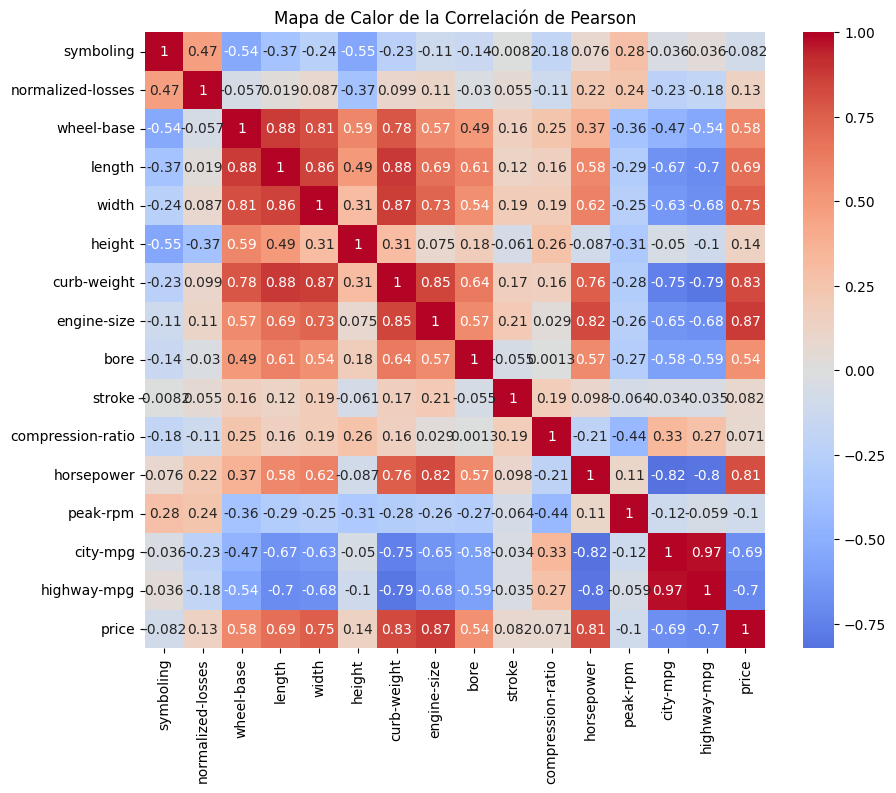

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# PREPROCESAMIENTO

In [ ]:
df['make'].unique() # ordinal

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df['fuel-type'].unique() #nominal

array(['gas', 'diesel'], dtype=object)

In [ ]:
df['aspiration'].unique() #nominal

array(['std', 'turbo'], dtype=object)

In [ ]:
df['num-of-doors'].unique() #nominal

array(['two', 'four'], dtype=object)

In [ ]:
df['body-style'].unique() # ordinal

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['drive-wheels'].unique() #nominal

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['engine-location'].unique() #nominal

array(['front', 'rear'], dtype=object)

In [ ]:
df['engine-type'].unique() #nominal

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [ ]:
df['num-of-cylinders'].unique() #nominal

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['fuel-system'].unique() #nominal

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price', axis = "columns")
y = df["price"]


X_number = df.loc[:, ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
                      'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']]
X_ordinal = df.loc[:, ['make','body-style']]
X_nominal = df.loc[:, ['fuel-type','aspiration','num-of-doors','drive-wheels','engine-location','engine-type',
                       'num-of-cylinders','fuel-system']]

In [ ]:
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [ ]:
y

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
196,16845
197,19045
198,21485
199,22470


# ORDINAL

In [ ]:
print(X_ordinal["make"].unique())
print(X_ordinal["body-style"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [ ]:
ordinal_encoder=OrdinalEncoder()
X_ordinal_encoded = ordinal_encoder.fit_transform(X_ordinal) # se almacena la matriz codificada por separado
X_ordinal_df = pd.DataFrame(X_ordinal_encoded, columns=X_ordinal.columns) # Se crea un DataFrame usando los nombres de las columnas originales
X_ordinal_df

,make,body-style
0,0.0,0.0
1,0.0,0.0
2,0.0,2.0
3,1.0,3.0
4,1.0,3.0
...,...,...
196,21.0,3.0
197,21.0,3.0
198,21.0,3.0
199,21.0,3.0


In [ ]:
X_ordinal_df.tail()

,make,body-style
196,21.0,3.0
197,21.0,3.0
198,21.0,3.0
199,21.0,3.0
200,21.0,3.0


In [ ]:
X_ordinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        201 non-null    float64
 1   body-style  201 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


# NOMINAL

In [ ]:
ohe = OneHotEncoder(sparse=False)
X_nominal = ohe.fit_transform(X_nominal)
X_nominal = pd.DataFrame(X_nominal, columns = ohe.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_nominal.head()

,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_nominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fuel-type_diesel         201 non-null    float64
 1   fuel-type_gas            201 non-null    float64
 2   aspiration_std           201 non-null    float64
 3   aspiration_turbo         201 non-null    float64
 4   num-of-doors_four        201 non-null    float64
 5   num-of-doors_two         201 non-null    float64
 6   drive-wheels_4wd         201 non-null    float64
 7   drive-wheels_fwd         201 non-null    float64
 8   drive-wheels_rwd         201 non-null    float64
 9   engine-location_front    201 non-null    float64
 10  engine-location_rear     201 non-null    float64
 11  engine-type_dohc         201 non-null    float64
 12  engine-type_l            201 non-null    float64
 13  engine-type_ohc          201 non-null    float64
 14  engine-type_ohcf         2

# Split

In [ ]:
X = pd.concat([X_number, X_ordinal_df, X_nominal], axis=1)

In [ ]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                201 non-null    int64  
 1   normalized-losses        201 non-null    float64
 2   wheel-base               201 non-null    float64
 3   length                   201 non-null    float64
 4   width                    201 non-null    float64
 5   height                   201 non-null    float64
 6   curb-weight              201 non-null    int64  
 7   engine-size              201 non-null    int64  
 8   bore                     201 non-null    float64
 9   stroke                   201 non-null    float64
 10  compression-ratio        201 non-null    float64
 11  horsepower               201 non-null    float64
 12  peak-rpm                 201 non-null    float64
 13  city-mpg                 201 non-null    int64  
 14  highway-mpg              2

In [ ]:
X.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,...,0.004975,0.019900,0.054726,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,...,0.070535,0.140007,0.228013,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


# Regresion Lineal

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELO

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
linear_model.predict(X_test_scaled)

array([ 7578.88422409, 26806.49661236,  6599.18194853,  6029.25249219,
       14007.6006101 ,  4788.4377473 , 40305.15485259,  9206.54263431,
       20936.79314595, 29329.95509709, 24417.27517931, 10582.58586086,
       12240.48869185,  9365.07898386, 12767.52859817,  8837.15498539,
       10777.26716457,  5905.81582489,  9669.7134447 , 40567.10195088,
       32528.        , 30670.29998344,  5894.50468156,  6542.03271499,
       25421.362629  , 13112.28565545, 10960.19207368, 26432.66781914,
       33401.19001543, 15505.28197889, 15163.2262655 ,  6562.36498497,
       14041.21127546,  7318.52852732,  5899.66807704, 13321.52472997,
        6053.27694979,  7460.66335189, 12799.66232443,  8281.93690512,
       13538.39050789, 16331.39109375,  9600.56302963,  7909.71462838,
       18208.58627702, 16967.40890583,  4518.9487791 ,  6662.38271916,
        9920.98856986,  5198.08749311, 16599.59820233, 20561.68045043,
       13816.35817447, 11087.24738796,  6895.48394144,  6362.90803545,
      

In [ ]:
# realizar predicciones
y_pred = linear_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 9895099.797058081
R-cuadrado: 0.8956121247225008


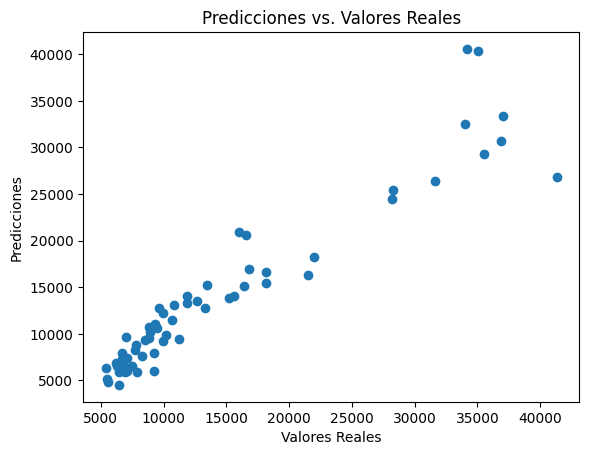

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

# COMENTARIO DE LA REGRESION LINEAL

Los resultados obtenidos son:

Error Cuadrático Medio (MSE): 9895099.797058081: Un valor elevado de MSE sugiere que el modelo no es muy preciso en sus predicciones. Sin embargo, es importante considerar la escala de los precios. Si los precios de los automóviles son muy altos, un MSE de este orden podría ser relativamente bajo.

R-cuadrado (R²): 0.8956121247225008:Este valor indica que el modelo explica aproximadamente el 89.56% de la variabilidad en los precios de los automóviles.

Un valor de R² cercano a 1 indica un buen ajuste del modelo a los datos. En este caso, el modelo parece capturar una gran parte de la variabilidad en los precios .

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

#'X_train' es el DataFrame utilizado para entrenar el modelo
# Obtener los nombres de las funciones de los datos de entrenamiento.
nombre_caracteristicas = X_train.columns

# Crea un nuevo DataFrame con todas las características necesarias, inicializado a 0
El_auto = pd.DataFrame(0, index=[0], columns=nombre_caracteristicas)

# Establecer los valores para las características conocidas.
El_auto['symboling'] = 0
El_auto['normalized-losses'] = 122
#El_auto['wheel-base'] = 97
#El_auto['length'] = 173
#El_auto['width'] = 65
#El_auto['height'] = 54
#El_auto['curb-weight'] = 2414
#El_auto['engine-size'] = 120
#El_auto['bore'] = 3.31
#El_auto['stroke'] = 3.2
#El_auto['compression-ratio'] = 9.4
#El_auto['horsepower'] = 111
#El_auto['peak-rpm'] = 5000
#El_auto['city-mpg'] = 21
#El_auto['highway-mpg'] = 27

#... agregar otras características conocidas con sus respectivos valores

# Manejar valores faltantes usando imputación
imputer = SimpleImputer(strategy='mean')  # Reemplazar NaN con la media de cada columna
El_auto_imputed = pd.DataFrame(imputer.fit_transform(El_auto), columns=El_auto.columns)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Realizar la predicción utilizando los datos imputados
prediccion = model.predict(El_auto_imputed)

# Imprimir la predicción
print("El precio predicho del vehiculo es:", prediccion)

El precio predicho del vehiculo es: [58059.68679811]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


COMENTARIO:

El resultado de la prediccion es un array que contiene el precio estimado de un vehiculo. En este caso, el precio predicho es de 58059.68679811 Este valor representa la estimacion del modelo sobre el precio del vehiculo con las caracteristicas especificadas:

symboling = 0

normalized-looses = 122

Sin embargo, por los resultados entregados por el MSE y el R cuadrado anteriormente, no es el modelo mas efectivo, ya que el valor de 58059 (asumimos que es dolar), esta relacionado con el valor mas alto de nuestro eje y que es 45400, lo que indica que el modelo de prediccion no esta funcionando

# K-Nearest Neighbors (KNN):

Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,...,0.004975,0.019900,0.054726,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,...,0.070535,0.140007,0.228013,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                201 non-null    int64  
 1   normalized-losses        201 non-null    float64
 2   wheel-base               201 non-null    float64
 3   length                   201 non-null    float64
 4   width                    201 non-null    float64
 5   height                   201 non-null    float64
 6   curb-weight              201 non-null    int64  
 7   engine-size              201 non-null    int64  
 8   bore                     201 non-null    float64
 9   stroke                   201 non-null    float64
 10  compression-ratio        201 non-null    float64
 11  horsepower               201 non-null    float64
 12  peak-rpm                 201 non-null    float64
 13  city-mpg                 201 non-null    int64  
 14  highway-mpg              2

In [ ]:
# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Realizar predicciones
y_pred = knn.predict(X_test)

In [ ]:
# Evaluar el modelo
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse_1}')
print(f'R-cuadrado: {r2_1}')

Error Cuadrático Medio: 24933749.89180328
R-cuadrado: 0.736962615103715


# COMENTARIO DE K-Nearest Neighbors (KNN):

Error Cuadrático Medio (MSE): 24933749.89180328:

Este valor indica que, en promedio, las predicciones del modelo están a una distancia de aproximadamente 24933749 unidades del valor real del automobil, un valor de MSE muy alto que la regresion lineal sugiere que el modelo está haciendo un trabajo peor en la predicción que el modelo anterior.

R-cuadrado (R²): 0.736962615103715: Este valor indica que el modelo solo explica alrededor del 73% de la varianza en los datos. Esto significa que hay muchas otras variables o factores que no están siendo capturados por el modelo y que influyen en el valor del automobil que se esta tratando de predecir, sin embargo, este resultado es peor que el obtenido por la regresion lineal anterior que era de un 89%

# Ajuste de Hiperparámetros

Para seleccionar el mejor valor de K, podemos usar la validación cruzada.

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Probar diferentes valores de K
k_values = list(range(1, 31))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 3


# Visualización de Resultados

Podemos visualizar cómo cambia el MSE con diferentes valores de K.

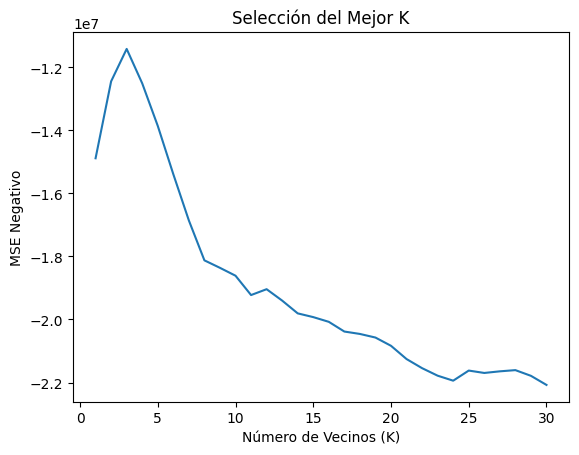

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

# Árbol de Decisión:

Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,...,0.004975,0.019900,0.054726,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,...,0.070535,0.140007,0.228013,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Realizar predicciones
y_pred = tree.predict(X_test)

In [ ]:
# Evaluar el modelo
mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse_2}')
print(f'R-cuadrado: {r2_2}')

Error Cuadrático Medio: 6572274.081967213
R-cuadrado: 0.9306661134067684


# COMENTARIO DEL ARBOL DE DECISION

Error Cuadrático Medio (MSE): 6572274.081967213: Este valor indica que, en promedio, las predicciones del árbol de decisión están a una distancia de aproximadamente 6572274 unidades de los valores reales de los automobiles, mucho mas bajos de los modelos anteriores ejecutados.

R-cuadrado (R²): 0.9306661134067684: Este valor suguiere que el modelo esta tomado alrededor del 93% de los datos, lo que es mejor que los dos modelos anteriores.

# Poda del Árbol

Podemos ajustar el modelo para evitar el sobreajuste limitando la profundidad del árbol o el número mínimo de muestras en una hoja

In [ ]:
# Entrenamiento del modelo con poda
tree_pruned = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_pruned.fit(X_train, y_train)

# Realizar predicciones
y_pred_pruned = tree_pruned.predict(X_test)

# Evaluar el modelo podado
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Error Cuadrático Medio (Podado): 8828186.704572015
R-cuadrado (Podado): 0.9068674726335425


COMENTARIO DE LA PODA DEL ARBOL DE DECISION

Error Cuadrático Medio (Podado): 8828186.704572015:

Este valor indica que, en promedio, las predicciones del árbol de decisión podado están a una distancia de aproximadamente 8828186 unidades de los valores reales de venta del automobil. Esta prediccion es mejor que las dos anteriores, pero ningun modelo se acerca a los valores reales de los automobiles


R-cuadrado (Podado): 0.9068674726335425: Este valor negativo indica que el modelo no está explicando bien la varianza de los datos. De hecho, está peor que los dos modelos anteriores. esto se podria explicar porque los datos elejidos son de mala calidad o no tienen una relacion para estimar el precio de venta de un vehiculo

# Benchmarking y Comparación de Modelos

In [ ]:
print('Regresion_lineal')
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')
print("El precio predicho del vehiculo es:", prediccion)
print()
print('KNN')
print(f'Error Cuadrático Medio: {mse_1}')
print(f'R-cuadrado: {r2_1}')
print(f'Mejor valor de K: {best_k}')
print()
print('Arbol de decision')
print(f'Error Cuadrático Medio: {mse_2}')
print(f'R-cuadrado: {r2_2}')
print()
print('Pode del arbol de decision')
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Regresion_lineal
Error Cuadrático Medio: 9895099.797058081
R-cuadrado: 0.8956121247225008
El precio predicho del vehiculo es: [58059.68679811]

KNN
Error Cuadrático Medio: 24933749.89180328
R-cuadrado: 0.736962615103715
Mejor valor de K: 3

Arbol de decision
Error Cuadrático Medio: 6572274.081967213
R-cuadrado: 0.9306661134067684

Pode del arbol de decision
Error Cuadrático Medio (Podado): 8828186.704572015
R-cuadrado (Podado): 0.9068674726335425


No hay una gran diferencia entre los 3 modelos, podemos ver que el R cuadrado del arbol es el mejor de los 3, seguodo de la regresion lineal y el que tuvo el mas bajo rendimiento es la prediccion K-Nearest Neighbord (KNN). pero este bajo rendimiento puede estar relacionado por las variables escogidas para realizar la simulacionm.

En los 3 modelos el MSE es super alto, donde el modelo KNN su MSE supera los 24 millones, en comparacion a los otros dos modelos con MSE cercanos a los 9 millones.